In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine(f"sqlite:///Resources/hawaii.sqlite")


In [6]:
# reflect an existing database into a new model
Base = automap_base()

In [7]:
# reflect the tables
Base.prepare(engine,reflect = True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each tab
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
#Perform a query to retrieve the data and precipitation scores
results=session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date.between ('2016-08-01','2017-12-31')).order_by(Measurement.date.asc()).all()

In [34]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date

results_df=pd.DataFrame(results)
results_df.head()

,date,prcp
0,2016-08-01,0.08
1,2016-08-01,2.35
2,2016-08-01,NaN
3,2016-08-01,0.54
4,2016-08-01,3.53


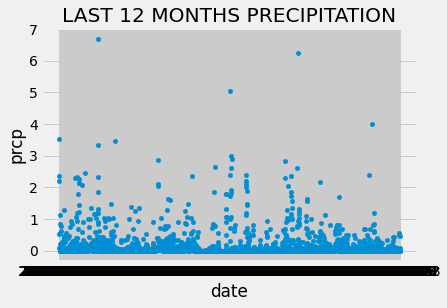

In [35]:
# Use Pandas Plotting with Matplotlib to plot the data
results_df.plot(kind='scatter',x='date',y='prcp',title='LAST 12 MONTHS PRECIPITATION')

In [33]:
# Use Pandas to calcualte the summary statistics for the precipitation data
pd.DataFrame.describe(results_df)

,prcp
count,3336.000000
mean,0.174559
std,0.487085
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,9.640000


In [87]:
# Design a query to show how many stations are available in this dataset?
amt_stations=session.query(Station.station).count()
amt_stations

9

In [213]:
#Total station activity
station_activity=session.query(Measurement.station).all()
df=pd.DataFrame(station_activity)

In [214]:
#What are the most active stations? (i.e. what stations have the most rows)?
    
df1=df.groupby(df.station).size()
df1.columns=['station','count']
st_cnt_df=pd.DataFrame(df1)
station_count_desc=st_cnt_df.reset_index().rename(columns={0:'count'})

# List the stations and the counts in descending order
station_count_desc=pd.DataFrame.sort_values(station_count_desc,by=['count'],ascending=False)
station_count_desc

,station,count
6,USC00519281,2772
7,USC00519397,2724
1,USC00513117,2709
8,USC00519523,2669
3,USC00516128,2612
2,USC00514830,2202
0,USC00511918,1979
4,USC00517948,1372
5,USC00518838,511


In [231]:
#Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

top_station=session.query(Measurement.station,Measurement.tobs).\
    filter(Measurement.station=='USC00519281').order_by(Measurement.tobs.asc()).all()

top_station_stat=pd.DataFrame(top_station)
pd.DataFrame.describe(top_station_stat)

,tobs
count,2772.000000
mean,71.663781
std,4.357642
min,54.000000
25%,69.000000
50%,72.000000
75%,74.000000
max,85.000000


In [ ]:
###Choose the station with the highest number of temperature observations.
###Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [245]:
###Choose the station with the highest number of temperature observations.
###Query the last 12 months of temperature observation data for this station and plot the results as a histogram
top_station_trend=session.query(Measurement.date,Measurement.tobs).\
    filter(Measurement.date.between ('2016-08-01','2017-12-31')).order_by(Measurement.date.asc()).all()
top_st_temp_trend=pd.DataFrame(top_station_trend)
top_st_temp_trend

,date,tobs
0,2016-08-01,77.0
1,2016-08-01,76.0
2,2016-08-01,78.0
3,2016-08-01,77.0
4,2016-08-01,76.0
...,...,...
2367,2017-08-22,76.0
2368,2017-08-23,81.0
2369,2017-08-23,82.0
2370,2017-08-23,82.0


Text(0.5, 1.0, 'Temp Trend Over 12 Months On Most Active Station')

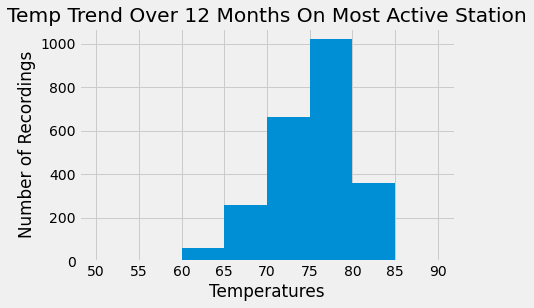

In [258]:
# Use Pandas Plotting with Matplotlib to plot the data#(kind='histogram',x='date',y='tobs',title='LAST 12 MONTHS TEMP')
bins=[50,55,60,65,70,75,80,85,90]

plt.hist(top_st_temp_trend.tobs,bins=bins)

plt.xticks(bins)

plt.ylabel('Number of Recordings')
plt.xlabel('Temperatures')
plt.title('Temp Trend Over 12 Months On Most Active Station')

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
